# TiTanic Data Visualization

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [74]:
data = pd.read_csv(r'C:\Users\IDEAPAD\Documents\GitHub\GoMyCode\checkpoint 3\resources\titanic-passengers-modif.csv')
data.head()#Entête du dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,Collander Mr. Erik Gustaf,male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,Moen Mr. Sigurd Hansen,male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,Jensen Mr. Hans Peder,male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,Palsson Mrs. Nils (Alma Cornelia Berglund),female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,Davidson Mr. Thornton,male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [75]:
data.describe()#Infos générales sur les colonnes et les valeurs

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [76]:
data.isnull().sum()#Recensement des valeurs nulles

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
data = data.dropna(axis=0)#suppression des lignes NaN
data = data.drop(['Fare', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'], axis=1)#suppression des lignes inutiles
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch
1,No,3,Moen Mr. Sigurd Hansen,male,25.0,0,0
4,No,1,Davidson Mr. Thornton,male,31.0,1,0
16,No,1,Widener Mr. Harry Elkins,male,27.0,0,2
19,Yes,1,Hoyt Mr. Frederick Maxfield,male,38.0,1,0
26,Yes,1,Frolicher-Stehli Mr. Maxmillian,male,60.0,1,1


In [78]:
# encoder = LabelEncoder()
# data['Survived'] = encoder.fit_transform(data['Survived'])
# data.drop(['No', 'Yes'], axis=1)
# data.head()

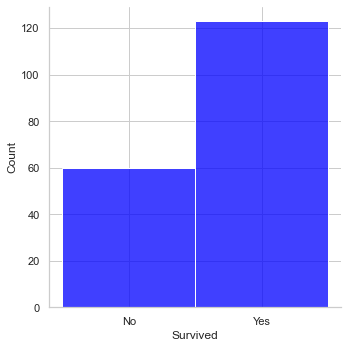

In [79]:
sns.set_theme(style = 'whitegrid')
sns.displot(data['Survived'], color="blue")#Nombre de personnes ayant survécu

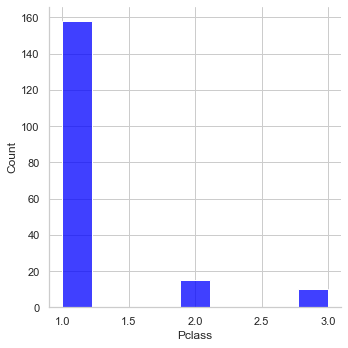

In [80]:
sns.displot(data['Pclass'], color="blue")#Nombre de personne par Class

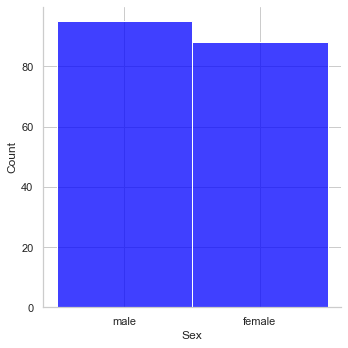

In [81]:
sns.displot(data['Sex'], color="blue")#Repartition des Sexes

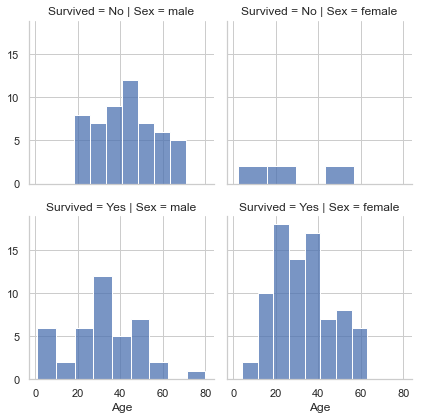

In [82]:
grid = sns.FacetGrid(data, row="Survived", col="Sex")
grid.map(sns.histplot, "Age")
grid.add_legend()

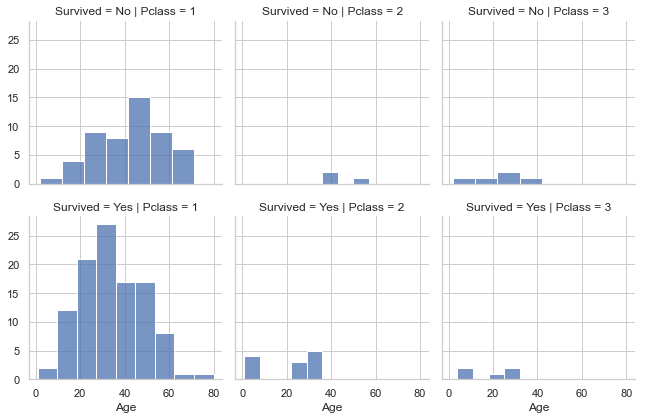

In [83]:
grid = sns.FacetGrid(data, row="Survived", col="Pclass")
grid.map(sns.histplot, "Age")
grid.add_legend()

In [84]:
#Def de la fonction

In [85]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 })

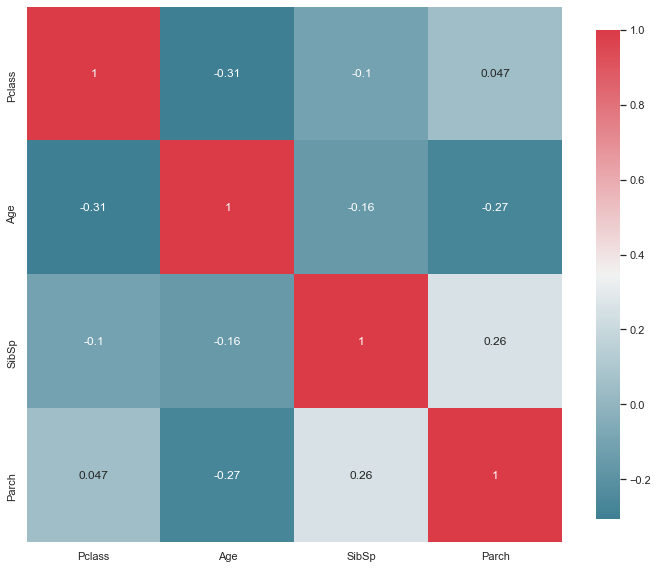

In [86]:
plot_correlation_map(data)

In [87]:
# Affichage d'une Matrice Identité

# La matrice de corrélation indique les valeurs de corrélation, qui mesurent le degré de relation linéaire entre chaque paire de variables. 

# Nous avons ici une matrice de corrélation, les valeurs de corrélations sont comprises entre -1 et 1
# Cette Matrice permet de mesurer l'importance de la relation entre deux variables.
# Si les deux variables ont tendance à augmenter et à diminuer en même temps, la valeur de corrélation est positive. Lorsqu'une variable augmente alors que l'autre diminue, la valeur de corrélation est négative.

# NB : Une relation linéaire est une relation binaire dans un ensemble E dont la représentation cartésienne est une droite.
#     On l'utilise dans çl'étude de la corrélation linéaire.

In [88]:
data.groupby(['Survived', 'Pclass']).mean()

Age     SibSp     Parch
Survived Pclass                               
No       1       42.971154  0.403846  0.442308
         2       43.166667  0.000000  0.666667
         3       23.400000  0.200000  0.400000
Yes      1       34.952075  0.528302  0.481132
         2       20.791667  0.500000  0.333333
         3       18.600000  0.200000  1.000000

In [89]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch
1,No,3,Moen Mr. Sigurd Hansen,male,25.0,0,0
4,No,1,Davidson Mr. Thornton,male,31.0,1,0
16,No,1,Widener Mr. Harry Elkins,male,27.0,0,2
19,Yes,1,Hoyt Mr. Frederick Maxfield,male,38.0,1,0
26,Yes,1,Frolicher-Stehli Mr. Maxmillian,male,60.0,1,1


In [90]:
tab_name = data['Name'].values
mylist = []
for val in tab_name:
    if "Capt." in val:
        mylist.append("Capt")
    elif "Col." in val:
        mylist.append("Col")
    elif "Major." in val:
        mylist.append("Major")
    elif "Dr." in val:
        mylist.append("Dr")
    elif "Rev." in val:
        mylist.append("Rev")
    elif "Jonkheer." in val:
        mylist.append("Jonkheer")
    elif "Don." in val:
        mylist.append("Don")
    elif "Sir." in val:
        mylist.append("Sir")
    elif "Lady." in val:
        mylist.append("Lady")
    elif "the Countess." in val:
        mylist.append("The Countess")
    elif "Dona." in val:
        mylist.append("Dona")
    elif "Mme." in val:
        mylist.append("Mme")
    elif "Mlle." in val:
        mylist.append("Mlle")
    elif "Miss." in val:
        mylist.append("Miss")
    elif "Ms." in val:
        mylist.append("Ms")
    elif "Mr." in val:
        mylist.append("Mr")
    elif "Mrs." in val:
        mylist.append("Mrs")
    elif "Master." in val:
        mylist.append("Master")

data['Title'] = mylist
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Title
1,No,3,Moen Mr. Sigurd Hansen,male,25.0,0,0,Mr
4,No,1,Davidson Mr. Thornton,male,31.0,1,0,Mr
16,No,1,Widener Mr. Harry Elkins,male,27.0,0,2,Mr
19,Yes,1,Hoyt Mr. Frederick Maxfield,male,38.0,1,0,Mr
26,Yes,1,Frolicher-Stehli Mr. Maxmillian,male,60.0,1,1,Mr


In [91]:
#Changement des titres grâce au dictionnaire
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                      "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                   "Lady" :      "Royalty",
                  "The Countess": "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs",
                    "Master" :    "Master"
                    }

titles = data['Title'].values
new_List=[]
for title in titles:
    for key, value in Title_Dictionary.items():
        if title == key:
            new_List.append(value)
data['Title'] = new_List
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Title
1,No,3,Moen Mr. Sigurd Hansen,male,25.0,0,0,Mrs
4,No,1,Davidson Mr. Thornton,male,31.0,1,0,Mrs
16,No,1,Widener Mr. Harry Elkins,male,27.0,0,2,Mrs
19,Yes,1,Hoyt Mr. Frederick Maxfield,male,38.0,1,0,Mrs
26,Yes,1,Frolicher-Stehli Mr. Maxmillian,male,60.0,1,1,Mrs


# Régression Logistique

In [92]:
data["Survived"] = data["Survived"].map({"Yes":1, "No":0})#Transform Cat Data to Num Data
data["Sex"] = data["Sex"].map({"male":1, "female":0})#Transform Cat Data to Num Data
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Title
1,0,3,Moen Mr. Sigurd Hansen,1,25.0,0,0,Mrs
4,0,1,Davidson Mr. Thornton,1,31.0,1,0,Mrs
16,0,1,Widener Mr. Harry Elkins,1,27.0,0,2,Mrs
19,1,1,Hoyt Mr. Frederick Maxfield,1,38.0,1,0,Mrs
26,1,1,Frolicher-Stehli Mr. Maxmillian,1,60.0,1,1,Mrs


Accuracy = 0.81 %


<AxesSubplot:xlabel='Age', ylabel='Survived'>

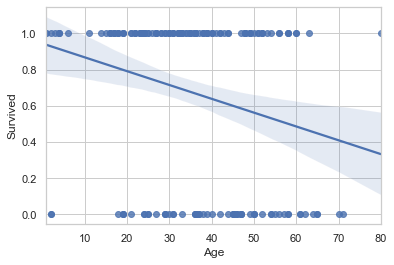

In [93]:
x = data[['Age', 'Pclass', 'Sex']]
y = data['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=40)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred  = logreg.predict(x_test)
print("Accuracy = {:.2f} %".format(logreg.score(x_test, y_test)))

sns.regplot(x='Age',y='Survived',data=data)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

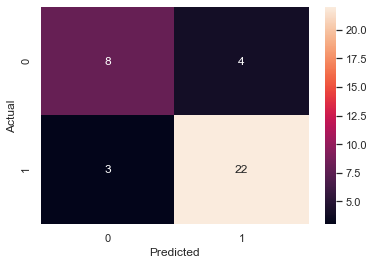

In [94]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.85      0.88      0.86        25

    accuracy                           0.81        37
   macro avg       0.79      0.77      0.78        37
weighted avg       0.81      0.81      0.81        37



# ROC & AUC

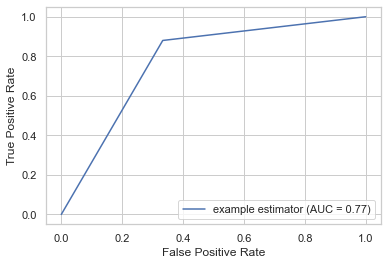

In [96]:
#ROC Plot
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()  
plt.show()